In [49]:
#Import necessary libraries
%matplotlib inline
import scipy as sp
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.cm as cm
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures


In [50]:
# Helper function to define plot characteristics
def make_plot():
    fig, axes=plt.subplots(figsize=(20,8), nrows=1, ncols=2);
    axes[0].set_ylabel("$p_R$", fontsize=18)
    axes[0].set_xlabel("$x$", fontsize=18)
    axes[1].set_xlabel("$x$", fontsize=18)
    axes[1].set_yticklabels([])
    axes[0].set_ylim([0,1])
    axes[1].set_ylim([0,1])
    axes[0].set_xlim([0,1])
    axes[1].set_xlim([0,1])
    plt.tight_layout();
    return axes
    

In [51]:
# Reading the file into a dataframe
df = pd.read_csv(r"G:\My Drive\4b - Courses\9 - Data Science\Datasets\ALL CSV FILES - 2nd Edition\noisypopulation.csv")


In [52]:
###edTest(get_data)###

# Set column x is the predictor and column y is the response variable.
# Column f is the true function of the given data
# Select the values of the columns

x = df.x.values
f = df.f.values
y = df.y.values


In [53]:
### edTest(test_poly) ###
# Function to compute the Polynomial Features for the data x 
# for the given degree d
def polyshape(d, x):
    return PolynomialFeatures(d).fit_transform(x.reshape(-1,1))
    

In [54]:
### edTest(test_linear) ###
# Function to fit a Linear Regression model 
def make_predict_with_model(x, y, x_pred):
    
    # Create a Linear Regression model with fit_intercept as False
    lreg = LinearRegression(fit_intercept=False)
    
    # Fit the model to the data x and y got parameters to the function
    lreg.fit(x, y)
    
    # Predict on the x_pred data got as a parameter to this function
    y_pred = lreg.predict(x_pred)

    # Return the linear model and the prediction on the test data
    return lreg, y_pred


In [55]:
# Function to perform sampling and fit the data, with the following parameters

# degree is the maximum degree of the model
# num_sample is the number of samples
# size is the number of random points selected from the data for each sample
# x is the predictor variable
# y is the response variable

def gen(degree, num_sample, size, x, y):
    
    # Create 2 lists to store the prediction and model
    predicted_values, linear_models =[], []
    
    # Loop over the number of samples
    for i in range(num_sample):
        
        # Helper code to call the make_predict_with_model function to fit on the data
        indexes=np.sort(np.random.choice(x.shape[0], size=size, replace=False))
        
        # lreg and y_pred hold the model and predicted values for the current sample
        lreg, y_pred = make_predict_with_model(polyshape(degree, x[indexes]), y[indexes], polyshape(degree, x))
        
        # Append the model and predicted values to the appropriate lists
        predicted_values.append(y_pred)
        linear_models.append(lreg)
    
    # Return the 2 lists, one for predicted values and one for the model
    return predicted_values, linear_models
    

In [56]:
### edTest(test_gen) ###
# Call the function gen() twice with x and y as the 
# predictor and response variable respectively

# Set the number of samples to 200 and the number of points as 30
# Store the return values in appropriate variables
# degree, num_sample, size, x, y
# Get results for degree 1
predicted_1, model_1 = gen(degree=1,num_sample=200,size=30,x=x,y=y);

# Get results for degree 100
predicted_100, model_100 = gen(degree=100,num_sample=200,size=30,x=x,y=y);


In [57]:
predicted_1[0].shape

(200,)

<Figure size 864x576 with 0 Axes>

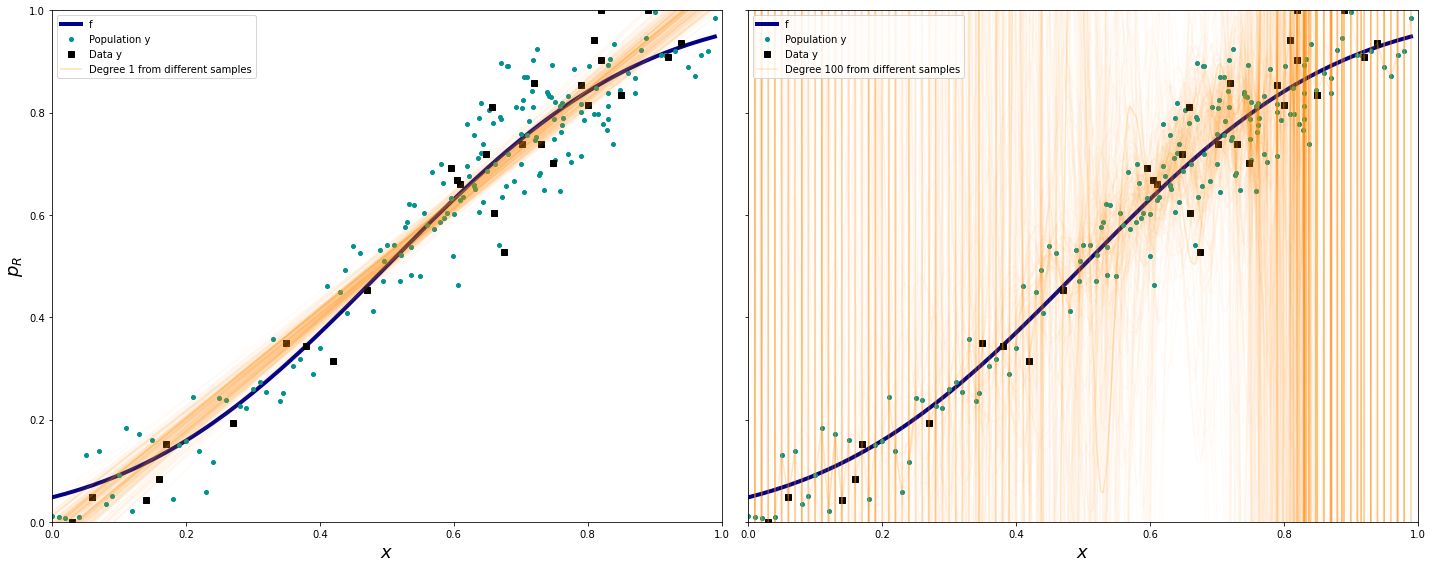

In [58]:
# Helper code to plot the data
indexes = np.sort(np.random.choice(x.shape[0], size=30, replace=False))

plt.figure(figsize = (12,8))
axes=make_plot()

# Plot for Degree 1
axes[0].plot(x,f,label="f", color='darkblue',linewidth=4)
axes[0].plot(x, y, '.', label="Population y", color='#009193',markersize=8)
axes[0].plot(x[indexes], y[indexes], 's', color='black', label="Data y")

for i,p in enumerate(predicted_1[:-1]):
    axes[0].plot(x,p,alpha=0.03,color='#FF9300')
axes[0].plot(x, predicted_1[-1], alpha=0.3,color='#FF9300',label="Degree 1 from different samples")


# Plot for Degree 100
axes[1].plot(x,f,label="f", color='darkblue',linewidth=4)
axes[1].plot(x, y, '.', label="Population y", color='#009193',markersize=8)
axes[1].plot(x[indexes], y[indexes], 's', color='black', label="Data y")


for i,p in enumerate(predicted_100[:-1]):
    axes[1].plot(x,p,alpha=0.03,color='#FF9300')
axes[1].plot(x,predicted_100[-1],alpha=0.2,color='#FF9300',label="Degree 100 from different samples")

axes[0].legend(loc='best')
axes[1].legend(loc='best')

plt.show();


#### ⏸ After you mark the exercise, run the code again, but this time with degree 10 instead of 100. Do you see a decrease in variance? Why are the edges still so erractic? Also check the values of the coefficients for each of your runs. Do you see a pattern? 


In [59]:
from sklearn.model_selection import train_test_split

In [60]:
v=np.arange(50)
x,y,a,b = train_test_split(v,v)